# **Importing Libraries**



In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio
from tensorflow.keras.preprocessing import image
import math
from random import randint

# **Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Colab Notebooks'

 cat_dog_classification.ipynb
'Cats Vs Dogs Classification with feature extraction.ipynb'
'cat vs dogs'
 CNN_TESTING.ipynb
 CS50P.ipynb
'DS w  python.ipynb'
 gui_covid.ipynb.txt
'Java in colab.ipynb'
 my
 notebooks
 Prediction_of_Average_Temperature.ipynb
'Pregrad DS demo.ipynb'
'Project 2.0.ipynb'
'Project 3.ipynb'
'Project 4.1.ipynb'
'Project 4.2.ipynb'
'Project 4.ipynb'
 Testing-prediction.ipynb
'Week 1 Getting Started with Java and Google Colab'


In [4]:
original_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/my"
base_dir = '/content/drive/My Drive/Colab Notebooks/working_directory'
os.mkdir(base_dir)

In [5]:
total_john_dir = '/content/drive/My Drive/Colab Notebooks/working_directory/total_john'
total_dawood_dir = '/content/drive/My Drive/Colab Notebooks/working_directory/total_dawood'
train_John_dir = '/content/drive/My Drive/Colab Notebooks/working_directory/train_John'
train_Dawood_dir = '/content/drive/My Drive/Colab Notebooks/working_directory/train_Dawood'
os.mkdir(total_john_dir)
os.mkdir(total_dawood_dir)
os.mkdir(train_John_dir)
os.mkdir(train_Dawood_dir)

In [6]:
# Base directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Subdirectories within train, validation, and test directories
train_john_dir = os.path.join(train_dir, 'john')
os.mkdir(train_john_dir)

train_dawood_dir = os.path.join(train_dir, 'dawood')
os.mkdir(train_dawood_dir)

validation_john_dir = os.path.join(validation_dir, 'john')
os.mkdir(validation_john_dir)

validation_dawood_dir = os.path.join(validation_dir, 'dawood')
os.mkdir(validation_dawood_dir)

test_john_dir = os.path.join(test_dir, 'john')
os.mkdir(test_john_dir)

test_dawood_dir = os.path.join(test_dir, 'dawood')
os.mkdir(test_dawood_dir)

In [7]:
print('total training john images:', len(os.listdir(train_john_dir)))
print('total training dawood images:', len(os.listdir(train_dawood_dir)))
print('total validation john images:', len(os.listdir(validation_john_dir)))
print('total validation dawood images:', len(os.listdir(validation_dawood_dir)))
print('total testing John images:', len(os.listdir(test_john_dir)))
print('total testing Dawood images:', len(os.listdir(test_dawood_dir)))

total training john images: 0
total training dawood images: 0
total validation john images: 0
total validation dawood images: 0
total testing John images: 0
total testing Dawood images: 0


/content/drive/MyDrive/Colab Notebooks/my/John-10.jpg


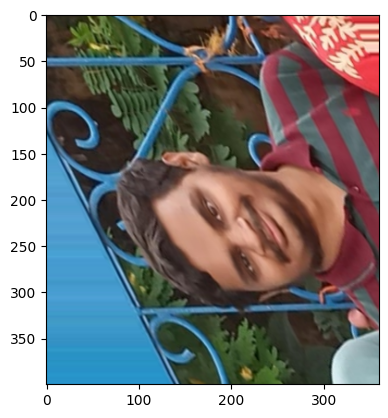

In [8]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[19])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

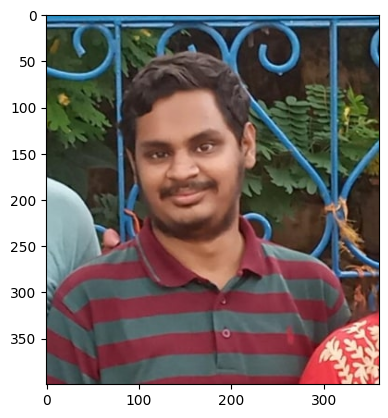

In [9]:
plt.imshow(img);

In [10]:
john_files = ['John-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in john_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_john_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [11]:
Dawood_files = ['Dawood-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in Dawood_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_dawood_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [12]:
print('total_dawood:', len(os.listdir(total_dawood_dir)))
print('total_john:', len(os.listdir(total_john_dir)))

total_dawood: 144
total_john: 144


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
all_files = [f for f in os.listdir(total_dawood_dir) if os.path.isfile(os.path.join(total_dawood_dir, f))]

In [15]:
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [16]:
def copy_files(file_list, src_dir, dst_dir):
    for fname in file_list:
        src_path = os.path.join(src_dir, fname)
        dst_path = os.path.join(dst_dir, fname)
        shutil.copyfile(src_path, dst_path)

In [17]:
# Copy the files to the respective directories
copy_files(train_files, total_dawood_dir, train_Dawood_dir)
copy_files(test_files, total_dawood_dir, test_dawood_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_Dawood_dir))}')
print(f'Total testing images: {len(os.listdir(test_dawood_dir))}')

Total training images: 128
Total testing images: 16


In [18]:
all_files = [f for f in os.listdir(total_john_dir) if os.path.isfile(os.path.join(total_john_dir, f))]

In [19]:
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [20]:
# Copy the files to the respective directories
copy_files(train_files, total_john_dir, train_John_dir)
copy_files(test_files, total_john_dir, test_john_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_John_dir))}')
print(f'Total testing images: {len(os.listdir(test_john_dir))}')

Total training images: 128
Total testing images: 16


In [21]:
all_files = [f for f in os.listdir(train_Dawood_dir) if os.path.isfile(os.path.join(train_Dawood_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [22]:
# Copy the files to the respective directories
copy_files(train_files, train_Dawood_dir, train_dawood_dir)
copy_files(test_files, train_Dawood_dir, validation_dawood_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_dawood_dir))}')
print(f'Total validation images: {len(os.listdir(validation_dawood_dir))}')

Total training images: 113
Total validation images: 15


In [23]:
all_files = [f for f in os.listdir(train_John_dir) if os.path.isfile(os.path.join(train_John_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [24]:
# Copy the files to the respective directories
copy_files(train_files, train_John_dir, train_john_dir)
copy_files(test_files, train_John_dir, validation_john_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_john_dir))}')
print(f'Total validation images: {len(os.listdir(validation_john_dir))}')

Total training images: 113
Total validation images: 15


In [25]:
print('total training John images:', len(os.listdir(train_john_dir)))
print('total training Dawood images:', len(os.listdir(train_dawood_dir)))
print('total validation John images:', len(os.listdir(validation_john_dir)))
print('total validation Dawood images:', len(os.listdir(validation_dawood_dir)))
print('total testing John images:', len(os.listdir(test_john_dir)))
print('total testing Dawood images:', len(os.listdir(test_dawood_dir)))

total training John images: 113
total training Dawood images: 113
total validation John images: 15
total validation Dawood images: 15
total testing John images: 16
total testing Dawood images: 16


# **Model Building**

In [26]:
model1 = models.Sequential()

#convolutional base
model1.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

#Flatten
model1.add(layers.Flatten())

#Dense classifier
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

**Optimizer**

In [28]:
from tensorflow.keras import optimizers

model1.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [31]:
#fitting
history = model1.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/100 ━━━━━━━━━━━━━━━━━━━━ 1:21 932ms/step - acc: 0.4815 - loss: 0.6939

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - acc: 0.5134 - loss: 0.6914 - val_acc: 0.5000 - val_loss: 0.6882
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - acc: 0.5601 - loss: 0.6828 - val_acc: 0.5333 - val_loss: 0.6767
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - acc: 0.5855 - loss: 0.6708 - val_acc: 0.6000 - val_loss: 0.6580
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - acc: 0.6297 - loss: 0.6503 - val_acc: 0.7667 - val_loss: 0.6422
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - acc: 0.6610 - loss: 0.6301 - val_acc: 0.7333 - val_loss: 0.6154
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - acc: 0.6590 - loss: 0.6101 - val_acc: 0.7667 - val_loss: 0.5914
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - acc: 0.7277 - loss: 0.5750 - val_acc: 0.7333 - val_loss: 0.5662
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - acc: 0.7540 - loss: 0.5362 - val_acc: 0.7667 - val_loss: 0.5356
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s

In [32]:
# model saving
model1.save('DJ_small_1.h5')

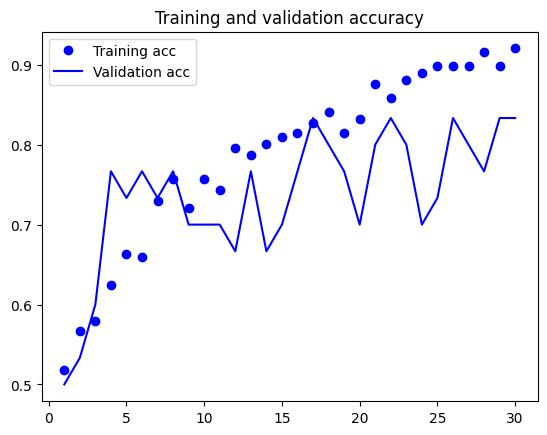

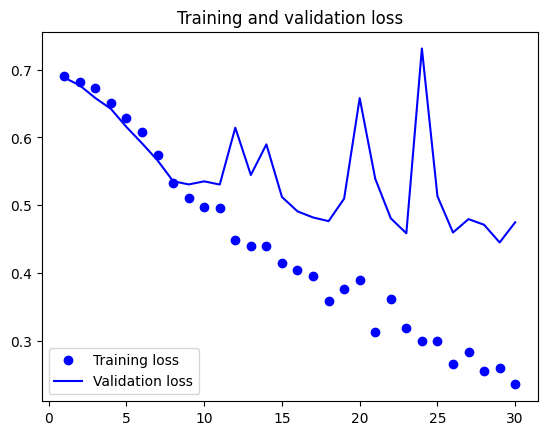

In [33]:
#plotting
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
#data augmentation by imagegenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

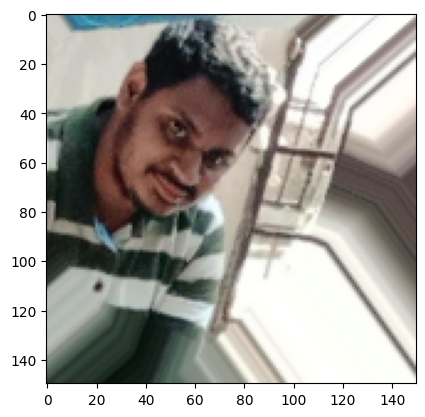

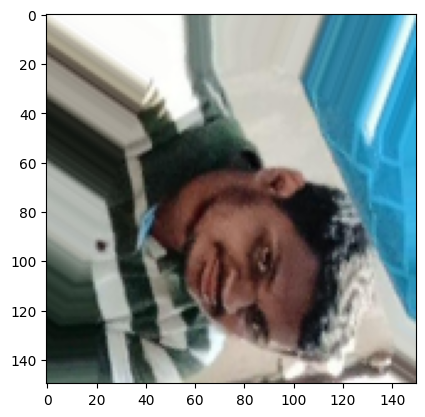

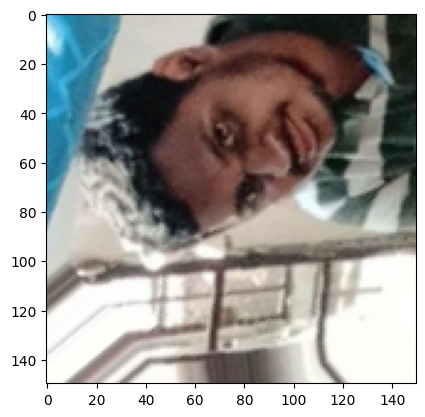

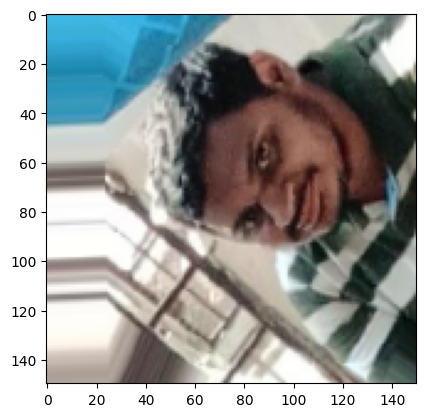

In [35]:
#displaying images

from keras.preprocessing import image

fnames = [os.path.join(train_john_dir, fname) for fname in os.listdir(train_john_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [36]:
#New model includes dropout
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model2.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [39]:
#fitting

history = model2.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - acc: 0.5252 - loss: 0.6957 - val_acc: 0.5000 - val_loss: 0.6948
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - acc: 0.4844 - loss: 0.6934 - val_acc: 0.5000 - val_loss: 0.6914
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - acc: 0.5097 - loss: 0.6955 - val_acc: 0.5000 - val_loss: 0.6887
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - acc: 0.5333 - loss: 0.6907 - val_acc: 0.5000 - val_loss: 0.6905
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - acc: 0.5180 - loss: 0.6920 - val_acc: 0.5000 - val_loss: 0.6862
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - acc: 0.5383 - loss: 0.6878 - val_acc: 0.6000 - val_loss: 0.6844
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - acc: 0.5466 - loss: 0.6895 - val_acc: 0.5000 - val_loss: 0.7145
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - acc: 0.5071 - loss: 0.6897 - val_acc: 0.5000 - val_loss: 0.6847
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━

In [40]:
#saving model 2
model2.save('DJ_small_2.h5')

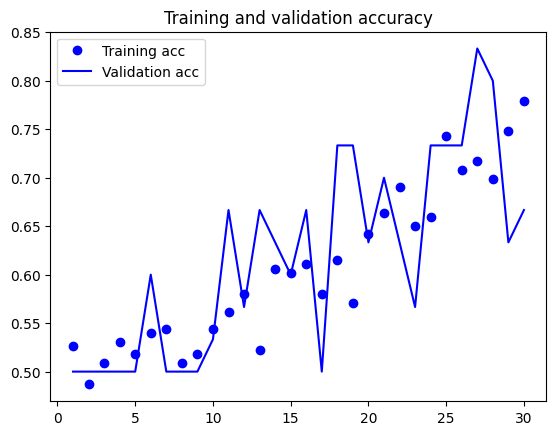

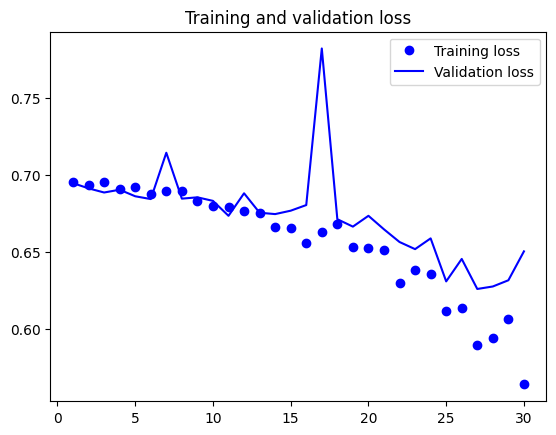

In [41]:
#Plotting
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
#FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

In [43]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [44]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from the correct module

In [46]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [47]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [48]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 226)
validation_features, validation_labels = extract_features(validation_dir, 30)
test_features, test_labels = extract_features(test_dir, 32)

Found 226 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Found 30 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Found 32 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [49]:
train_features = np.reshape(train_features, (226, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (30, 4 * 4 * 512))
test_features = np.reshape(test_features, (32, 4 * 4 * 512))

In [50]:
#Defining and training the densely connected classifier

In [51]:
from keras import models
from keras import layers
from keras import optimizers

In [52]:
#Build model

In [53]:
model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#compile
model3.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [55]:
#Fitting
history = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.5078 - loss: 0.7722 - val_acc: 0.6333 - val_loss: 0.6375
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.6155 - loss: 0.6363 - val_acc: 0.7333 - val_loss: 0.5929
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7473 - loss: 0.5658 - val_acc: 0.7667 - val_loss: 0.5613
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7346 - loss: 0.5726 - val_acc: 0.8000 - val_loss: 0.5311
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.7931 - loss: 0.4651 - val_acc: 0.8333 - val_loss: 0.5050
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.8222 - loss: 0.4473 - val_acc: 0.8333 - val_loss: 0.4806
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.8880 - loss: 0.3716 - val_acc: 0.8333 - val_loss: 0.4625
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.8489 - loss: 0.3952 - val_acc: 0.8667 - val_loss: 0.4445
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.8489

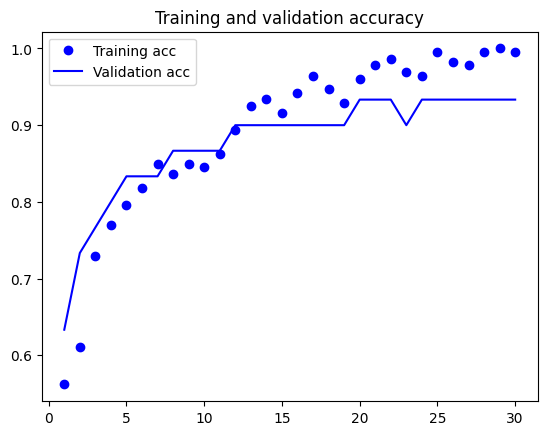

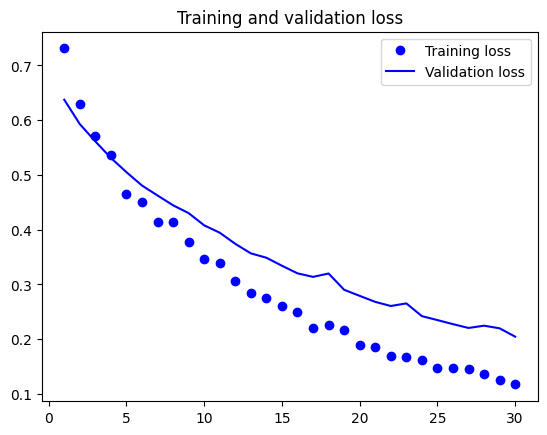

In [56]:
#Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
#FEATURE EXTRACTION WITH DATA AUGMENTATION
#Adding a densely connected classifier on top of the convolutional base

In [58]:
from keras import models
from keras import layers

In [59]:
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model4.summary()

ValueError: Undefined shapes are not supported.

In [61]:
#Freezing
print('This is the number of trainable weights '
'before freezing the conv base:', len(model4.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model4.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [62]:
#Training the model end to end with a frozen convolutional base


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [63]:
#compile
model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [64]:
#Fitting
history = model4.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 579ms/step - acc: 0.5028 - loss: 0.7079 - val_acc: 0.7000 - val_loss: 0.6495
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 591ms/step - acc: 0.6693 - loss: 0.6290 - val_acc: 0.7333 - val_loss: 0.5803
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 567ms/step - acc: 0.7292 - loss: 0.5718 - val_acc: 0.6667 - val_loss: 0.5441
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 566ms/step - acc: 0.7273 - loss: 0.5454 - val_acc: 0.7333 - val_loss: 0.5099
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 556ms/step - acc: 0.8144 - loss: 0.5054 - val_acc: 0.8000 - val_loss: 0.4750
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 552ms/step - acc: 0.7820 - loss: 0.4810 - val_acc: 0.8667 - val_loss: 0.4433
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 589ms/step - acc: 0.7805 - loss: 0.4694 - val_acc: 0.8667 - val_loss: 0.4274
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 576ms/step - acc: 0.7814 - loss: 0.4790 - val_acc: 0.8667 - val_loss: 0.4078
Epoch 9/30
100/100 ━━━━━━━━━━━━━

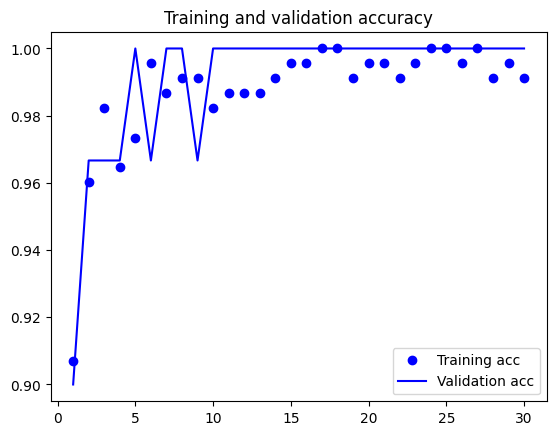

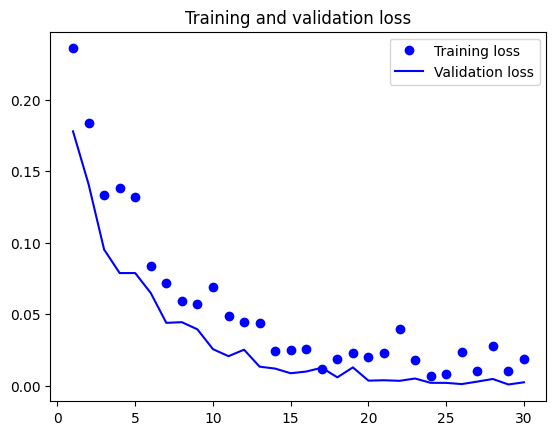

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
model4.save('DJ_small_4.h5')

In [67]:
#FINE-TUNNING

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [68]:
#Freezing all layers up to a specific one

conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [69]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [70]:
#compile
model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [71]:
#Fitting
history = model4.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 676ms/step - acc: 0.9033 - loss: 0.2417 - val_acc: 0.9000 - val_loss: 0.1778
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 747ms/step - acc: 0.9593 - loss: 0.1854 - val_acc: 0.9667 - val_loss: 0.1409
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 706ms/step - acc: 0.9797 - loss: 0.1352 - val_acc: 0.9667 - val_loss: 0.0952
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 656ms/step - acc: 0.9656 - loss: 0.1367 - val_acc: 0.9667 - val_loss: 0.0788
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 663ms/step - acc: 0.9742 - loss: 0.1317 - val_acc: 1.0000 - val_loss: 0.0788
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 655ms/step - acc: 0.9961 - loss: 0.0846 - val_acc: 0.9667 - val_loss: 0.0648
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 667ms/step - acc: 0.9854 - loss: 0.0716 - val_acc: 1.0000 - val_loss: 0.0440
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 719ms/step - acc: 0.9913 - loss: 0.0596 - val_acc: 1.0000 - val_loss: 0.0444
Epoch 9/30
100/100 ━━━━━━━━━━━━━

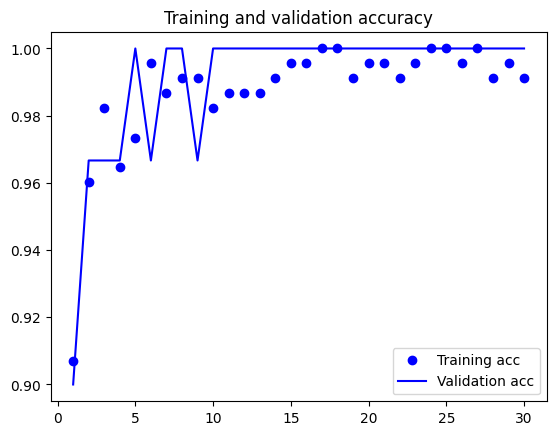

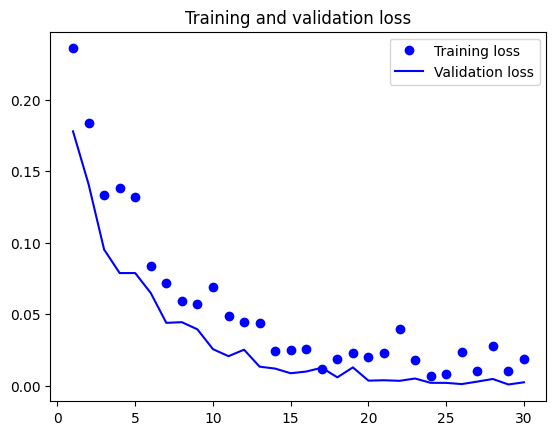

In [73]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [81]:
#saving model 5
model4.save('DJ5.h5')

In [83]:
# Directory containing the images
img_directory = '/content/drive/MyDrive/Colab Notebooks/working_directory/test/dawood'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]
i=0
# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.
    predlist.append(model.predict(img_tensor))
    print(f"Loaded image: {img_file}")
    plt.imshow(img_tensor[0])
    plt.show()
    if predlist[i] >= 0.50:                  #sigmoid activation function(range: 0 - 1)- 1st category: John - 0,
                                                                                 #2nd category: Dawood - 1

      print("John\n\n\n\n\n\n")

    else:
      print("Dawood\n\n\n\n\n\n")

    i+=1

Output hidden; open in https://colab.research.google.com to view.

In [84]:
# Directory containing the images
img_directory = '/content/drive/MyDrive/Colab Notebooks/working_directory/test/john'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]
predlist = []
i=0
# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.
    predlist.append(model.predict(img_tensor))
    print(f"Loaded image: {img_file}")
    plt.imshow(img_tensor[0])
    plt.show()
    if predlist[i] >= 0.50:                  #sigmoid activation function(range: 0 - 1)- 1st category: John - 0,
                                                                                 #2nd category: Dawood - 1

      print("John\n\n\n\n\n\n")

    else:
      print("Dawood\n\n\n\n\n\n")

    i+=1


Output hidden; open in https://colab.research.google.com to view.